# AI Project

# Credit_Card_Fraud_Detection

### DATA SOURCE

__[DATA ACQUISITION
DATA SOURCE
Credit Card Fraud Detection Anonymized credit card transactions labeled as fraudulent or genuine](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)__

### METADATA: About The Dataset

#####  -The dataset contains transactions made by credit cards in September 2013 by European cardholders.

-The dataset contains transactions made by credit cards in September 2013 by European cardholders.

-This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

-The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

-Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

-Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
 
-Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns


**--> Load Dataset**

In [2]:
data = pd.read_csv('creditcard.csv')

**Analysis Of Dataset**

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

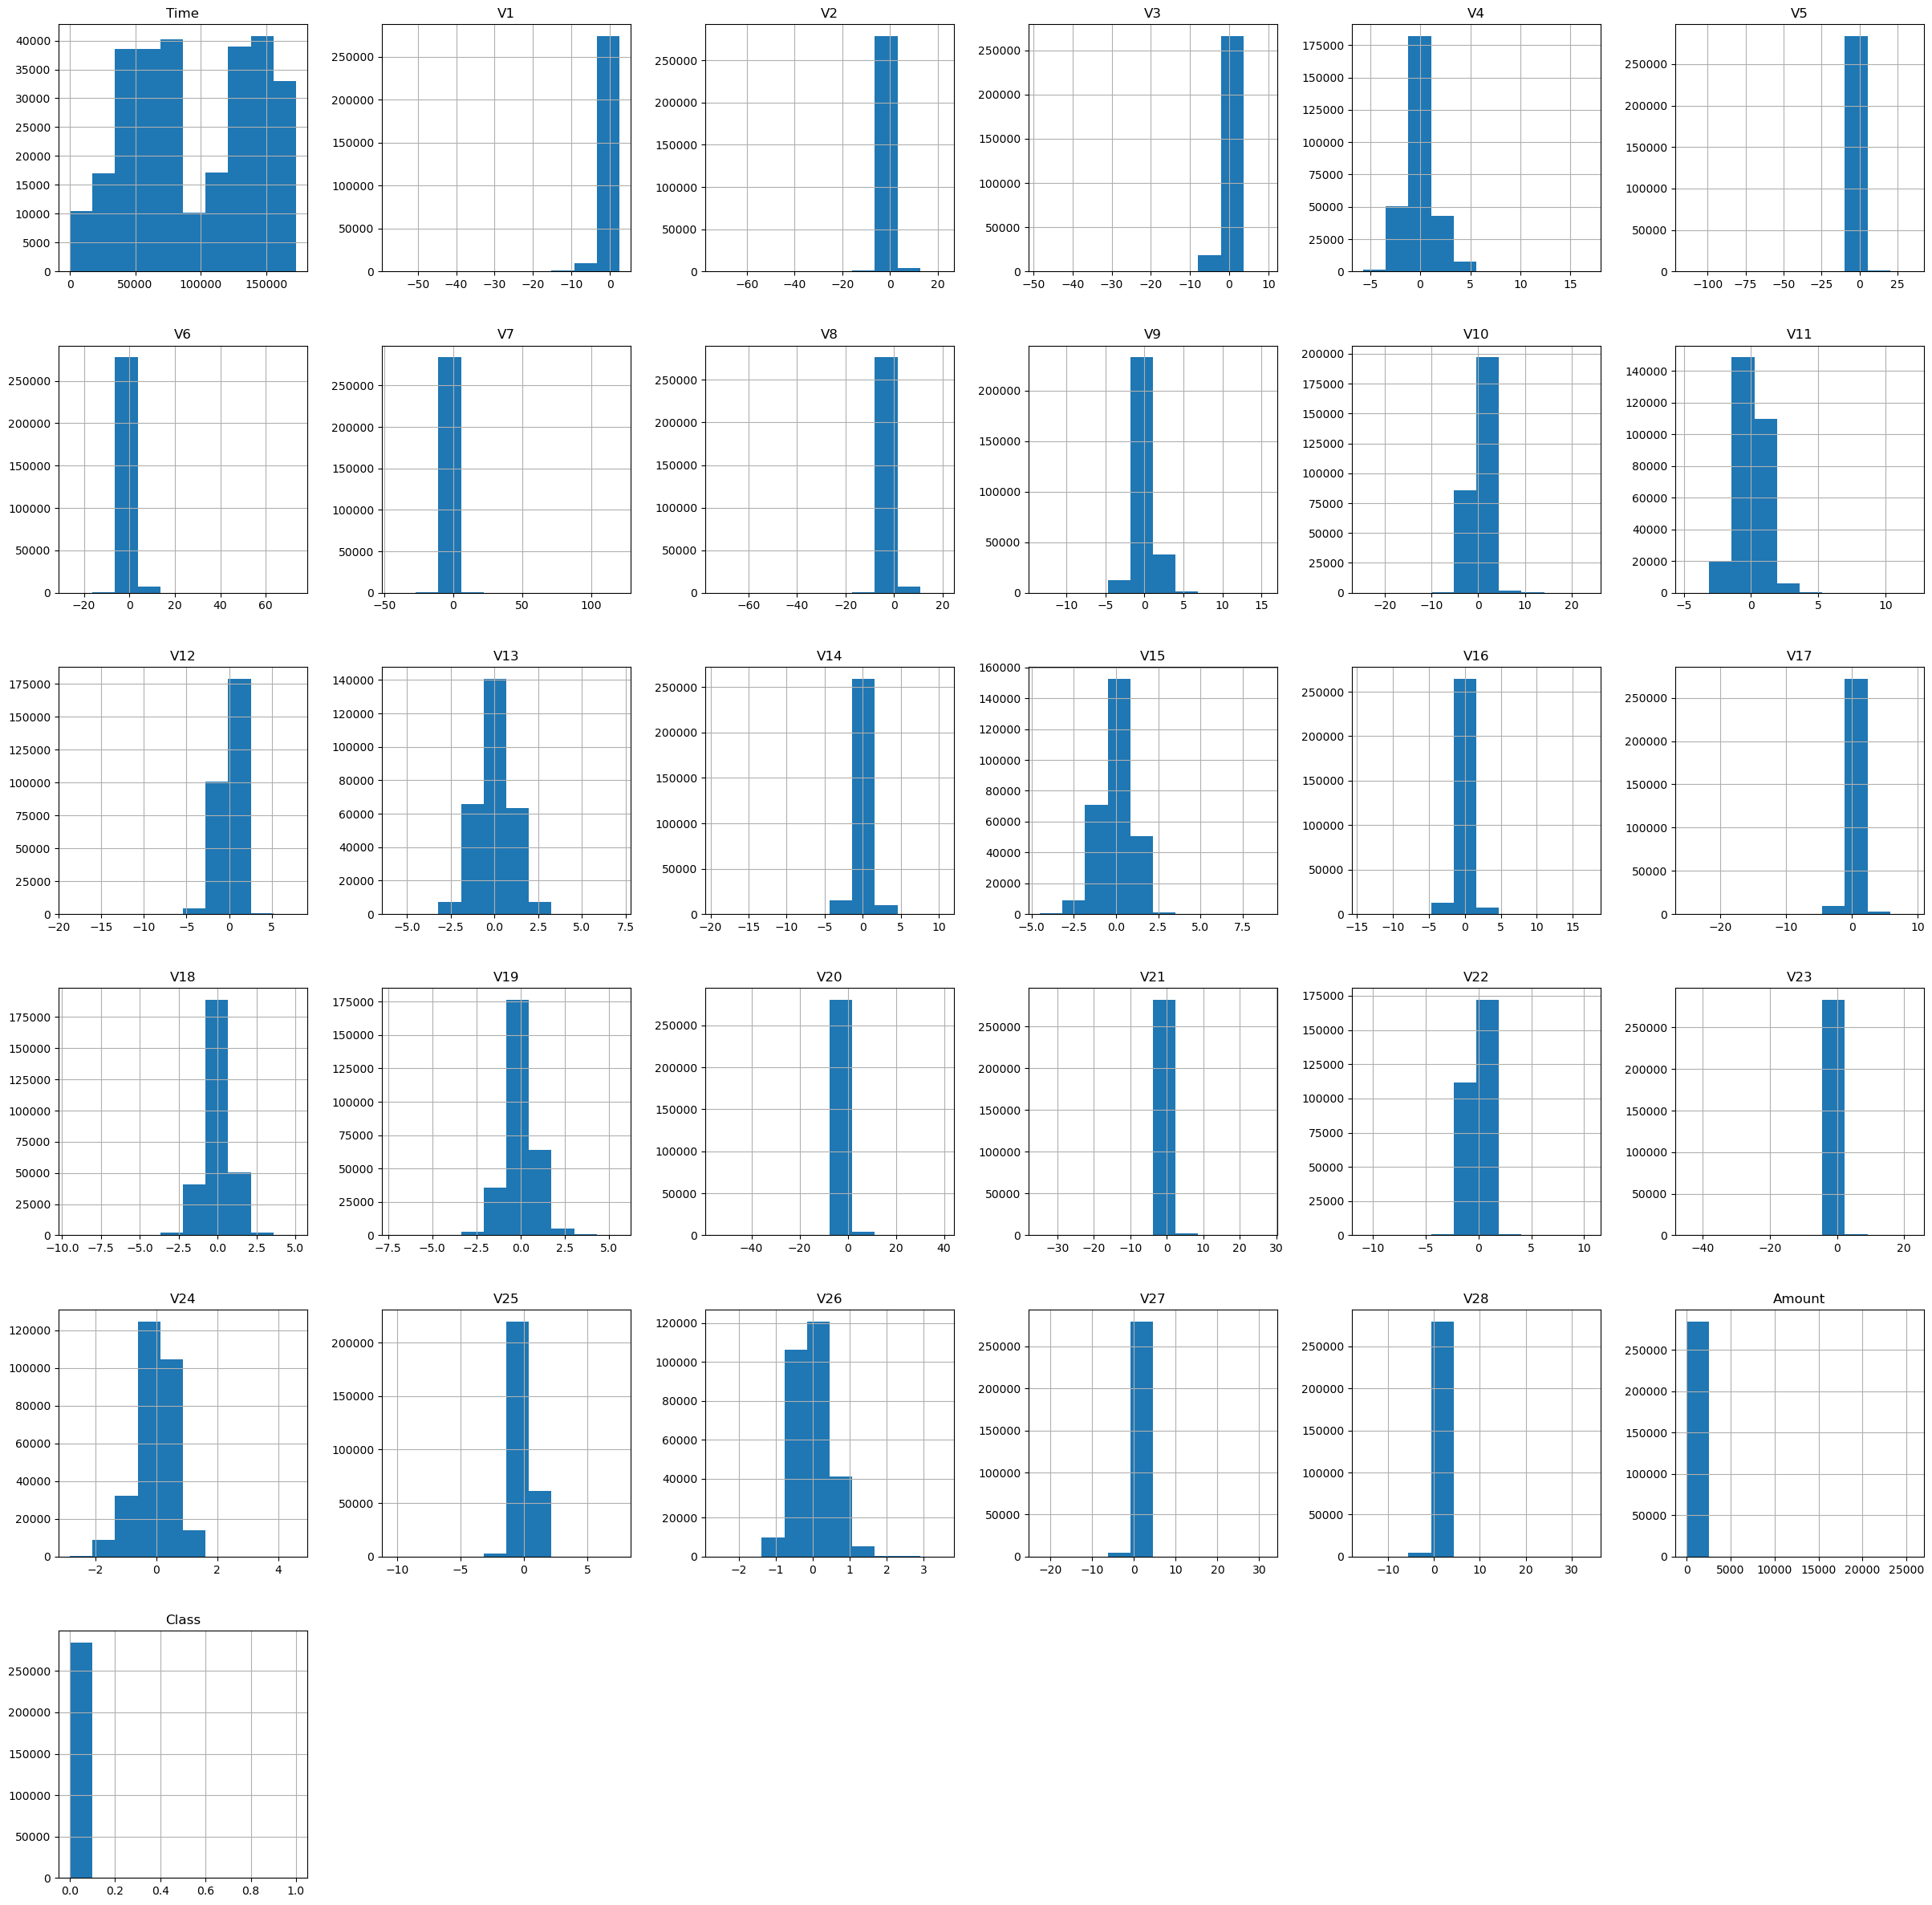

In [4]:
data.hist(figsize=(30, 30))

In [5]:
data.shape

(284807, 31)

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Checking for Missing values**

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**Preprocessing -- StandardScaler**

In [10]:
SC = StandardScaler()
amount = data['Amount'].values
data['Amount'] = SC.fit_transform(amount.reshape(-1, 1))

In [11]:
data = data.drop('Time',axis = 1)

In [12]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
x = data.drop('Class', axis = 1)
#x = data.iloc[: , :-1].values
y = data['Class']
# x = fearures
# y = result or output

In [14]:
print(x.shape,y.shape)

(284807, 29) (284807,)


**Test Split of the New Data**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [16]:
print("The shape of X_train is:",x_train.shape)
print("The shape of X_test is:",x_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (227845, 29)
The shape of X_test is: (56962, 29)
The shape of y_train is: (227845,)
The shape of y_test is: (56962,)


# Models

1. **Logistic Regression**

In [17]:
LogReg = LogisticRegression()

In [18]:
LogReg.fit(x_train,y_train)

LogisticRegression()

--> Predicting the accuracy of the Logistic Regression

In [19]:
LogReg_pred = LogReg.predict(x_test)

<Axes: >

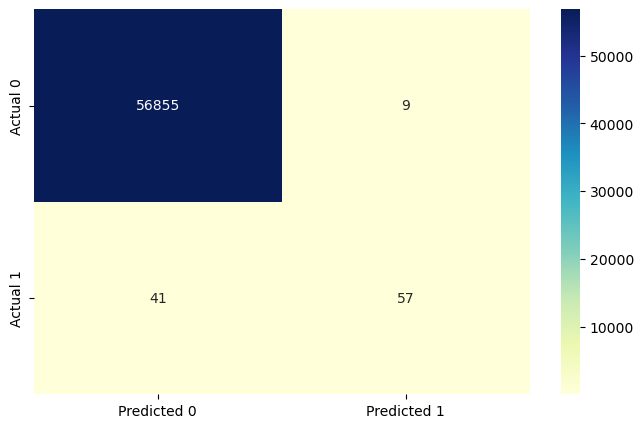

In [24]:
CM = confusion_matrix(y_test, LogReg_pred)
Con_Matrix = pd.DataFrame(data = CM, columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
plt.figure(figsize = (8 ,5))
sns.heatmap(Con_Matrix, annot=True ,fmt='d' ,cmap='YlGnBu')

In [21]:
LogReg_Accuracy = accuracy_score(y_test, LogReg_pred)
print("LogisticRegression Accuracy : ",LogReg_Accuracy * 100,'%')

LogisticRegression Accuracy :  99.91222218320986 %


2. **RandomForestClassifier**

In [28]:
RFC = RandomForestClassifier()

In [ ]:
RFC.fit(x_train, y_train)

--> Predicting the accuracy of the RandomForestClassifier

In [ ]:
RFC_pred = RFC.predict(x_test)

In [ ]:
RFC_Accuracy = accuracy_score(y_test ,RFC_pred)
print("RandomForestClassifier Accuracy : ",RFC_Accuracy * 100,'%')

3. **Decision Tree Classifier**

In [ ]:
DTC = DecisionTreeClassifier()

In [ ]:
DTC = DTC.fit(x_train, y_train)

In [ ]:
DTC_pred = DTC.predict(x_test)

--> Predicting the accuracy of the Decision Tree Classifier

In [ ]:
DTC_Accuracy = accuracy_score(y_test, DTC_pred)
print("Decision Tree Classifier Accuracy : ",DTC_Accuracy * 100,'%')

**Compare 3 Models**

In [ ]:
final_data = pd.DataFrame({
  'Model':[
    'LogReg : ','RFC : ','DTC : '
    ],

  'Accuracy':[
      LogReg_Accuracy *100,
      RFC_Accuracy *100,
      DTC_Accuracy *100
   ]
})
final_data

In [ ]:
models = ['LogReg','RFC','DTC']
plt.bar(models,final_data['Accuracy'],color=['blue','green','red'])